# TRY CLIP MODEL

First test of CLIP model with Tensorflow (from HuggingFace) and design of a test Lambda function for extracting text features 

In [1]:
import tensorflow as tf
import transformers
import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from PIL import Image

2023-03-24 21:47:50.426308: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-24 21:47:50.426367: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-24 21:47:52.564702: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-24 21:47:52.564835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-24 21:47:52.564855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

### <b>CONSTANTS</b>

In [2]:
DATA_PATH = 'data'
IMAGES_PATH = os.path.join(DATA_PATH, 'unsplash-research-dataset-lite-latest')
IMAGES_OUTPUT = os.path.join(DATA_PATH, 'unsplash_output_images')
ASSETS_PATH = os.path.join(DATA_PATH, 'assets')
RESIZE = (256,256)

### Test text features

In [3]:
from transformers import CLIPTokenizer, TFCLIPModel

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(["a photo of a hound", "a photo of a dog"], padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs)

2023-03-24 21:48:05.180072: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-24 21:48:05.180173: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-24 21:48:05.180225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (robert-VirtualBox): /proc/driver/nvidia/version does not exist
All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


In [4]:
text_features

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01764771, -0.06101748, -0.48657253, ..., -0.52767116,
        -0.40301576,  0.09337825],
       [ 0.09318563,  0.2764239 , -0.4137126 , ..., -0.5851508 ,
        -0.25898555,  0.11934153]], dtype=float32)>

In [ ]:
text_features[1].shape

In [ ]:
inputs = tokenizer(["two people", "three animals"], padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs)
text_features

In [ ]:
model = TFCLIPModel.from_pretrained("/home/robert/.cache/huggingface/hub/models--openai--clip-vit-base-patch32/snapshots/e6a30b603a447e251fdaca1c3056b2a16cdfebeb/")

tokenizer = CLIPTokenizer.from_pretrained("/home/robert/.cache/huggingface/hub/models--openai--clip-vit-base-patch32/snapshots/e6a30b603a447e251fdaca1c3056b2a16cdfebeb/")

inputs = tokenizer(["a photo of a hound", "a photo of a dog"], padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs)

In [ ]:
m = tf.keras.metrics.CosineSimilarity()
m.update_state(text_features[0], text_features[1])
m.result().numpy()

### Test image features

In [5]:
df_images = pd.read_csv(os.path.join(IMAGES_PATH, 'photos.tsv000'), delimiter='\t')
df_images.head()

photo_id                                photo_url  \
0  XMyPniM9LF0  https://unsplash.com/photos/XMyPniM9LF0   
1  rDLBArZUl1c  https://unsplash.com/photos/rDLBArZUl1c   
2  cNDGZ2sQ3Bo  https://unsplash.com/photos/cNDGZ2sQ3Bo   
3  iuZ_D1eoq9k  https://unsplash.com/photos/iuZ_D1eoq9k   
4  BeD3vjQ8SI0  https://unsplash.com/photos/BeD3vjQ8SI0   

                                     photo_image_url  \
0  https://images.unsplash.com/uploads/1411949294...   
1  https://images.unsplash.com/photo-141633941111...   
2  https://images.unsplash.com/photo-142014251503...   
3  https://images.unsplash.com/photo-141487280988...   
4  https://images.unsplash.com/photo-141700759404...   

           photo_submitted_at photo_featured  photo_width  photo_height  \
0  2014-09-29 00:08:38.594364              t         4272          2848   
1   2014-11-18 19:36:57.08945              t         3000          4000   
2  2015-01-01 20:02:02.097036              t         2564          1710   
3  2014-11-01 20:15:13.410073              t         2912          4368   
4  2014-11-26 13:13:50.134383              t         4896          3264   

   photo_aspect_ratio           photo_description photographer_username  ...  \
0                1.50    Woman exploring a forest     michellespencer77  ...   
1                0.75   Succulents in a terrarium                ugmonk  ...   
2                1.50   Rural winter mountainside             johnprice  ...   
3                0.67     Poppy seeds and flowers            krisatomic  ...   
4                1.50  Silhouette near dark trees         jonaseriksson  ...   

  photo_location_country photo_location_city stats_views stats_downloads  \
0                    NaN                 NaN     2375421            6967   
1                    NaN                 NaN    13784815           82141   
2                    NaN                 NaN     1302461            3428   
3                    NaN                 NaN     2890238           33704   
4                    NaN                 NaN     8704860           49662   

                                      ai_description ai_primary_landmark_name  \
0              woman walking in the middle of forest                      NaN   
1          succulent plants in clear glass terrarium                      NaN   
2           rocky mountain under gray sky at daytime                      NaN   
3  red common poppy flower selective focus phography                      NaN   
4                            trees during night time                      NaN   

  ai_primary_landmark_latitude ai_primary_landmark_longitude  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

  ai_primary_landmark_confidence                     blur_hash  
0                            NaN  L56bVcRRIWMh.gVunlS4SMbsRRxr  
1                            NaN  LvI$4txu%2s:_4t6WUj]xat7RPoe  
2                            NaN  LhMj%NxvM{t7_4t7aeoM%2M{ozj[  
3                            NaN  LSC7DirZAsX7}Br@GEWWmnoLWCnj  
4                            NaN  L25|_:V@0hxtI=W;odae0ht6=^NG  

[5 rows x 31 columns]

In [ ]:
pd.read_csv(os.path.join(IMAGES_PATH, 'colors.tsv000'), delimiter='\t').head()

In [ ]:
pd.read_csv(os.path.join(IMAGES_PATH, 'collections.tsv000'), delimiter='\t').head()

In [ ]:
pd.read_csv(os.path.join(IMAGES_PATH, 'keywords.tsv000'), delimiter='\t').head()

In [ ]:
idx = np.random.randint(len(df_images))
image_data = requests.get(df_images.loc[idx, 'photo_image_url'], stream=True).content
image_data = tf.io.decode_image(image_data).numpy()
plt.imshow(image_data)

In [ ]:
response = requests.get(df_images.loc[idx, 'photo_image_url'], stream=True)
response.headers['Content-Type'].split('/')[-1]

#### Download images

In [ ]:
from io import BytesIO

if not os.path.exists(IMAGES_OUTPUT):
    os.mkdir(IMAGES_OUTPUT)

NUM_IMAGES = 200
idx_list = np.random.randint(len(df_images), size=NUM_IMAGES)

for idx in idx_list:
    image = df_images.iloc[idx]
    response = requests.get(image['photo_image_url'], stream=True)
    
    if response.status_code == 200:
        extension = response.headers['Content-Type'].split('/')[-1]
        extension = 'jpeg' if extension == 'octet-stream' else extension
        image_path = os.path.join(IMAGES_OUTPUT, image['photo_id'] + '.' + extension)
        
        if not os.path.exists(image_path):
            img = Image.open(BytesIO(response.content)).resize(RESIZE)
            img.save(image_path)
        else:
            print(f"Image with ID {image['photo_id']}[{idx}] already exists in directory")
    else:
        print(f"Image with ID {image['photo_id']}[{idx}] failed to download")

In [ ]:
from multiprocessing import Pool
from io import BytesIO

def download_images(image):
    url, image_id = image[0], image[1]
    response = requests.get(url, stream=True)
    
    if response.status_code == 200:
        extension = response.headers['Content-Type'].split('/')[-1]
        extension = 'jpeg' if extension == 'octet-stream' else extension
        image_path = os.path.join(IMAGES_OUTPUT, image_id + '.' + extension)
        
        if not os.path.exists(image_path):
            img = Image.open(BytesIO(response.content)).resize(RESIZE)
            img.save(image_path)
        else:
            print(f"Image with ID {image_id} already exists in directory")
    else:
        print(f"Image with ID {image_id} failed to download")

NUM_IMAGES = 500     
images = df_images.loc[NUM_IMAGES:NUM_IMAGES*2, ['photo_image_url', 'photo_id']].to_numpy().tolist()

pool = Pool()
pool.map(download_images, images)

In [ ]:
image_paths = pd.DataFrame(os.listdir(IMAGES_OUTPUT), columns=['filename'])
image_paths

In [ ]:
from transformers import CLIPProcessor, TFCLIPModel

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [6]:
from transformers import CLIPProcessor, TFCLIPModel

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

idx = np.random.randint(len(df_images))
random_image = df_images.iloc[idx]
image = Image.open(requests.get(random_image['photo_image_url'], stream=True).raw)

inputs = processor(images=image, return_tensors="tf")

image_features = model.get_image_features(**inputs)
image_features

All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-5.43879457e-02,  3.64813268e-01, -1.14857100e-01,
         1.51581064e-01, -3.33521739e-02, -1.39254019e-01,
         4.19735461e-01,  3.38559210e-01, -6.37669146e-01,
         4.37916189e-01,  2.77314454e-01, -1.87596023e-01,
         2.47465715e-01, -6.55930936e-01,  3.31287026e-01,
        -2.14489624e-02, -4.43020135e-01,  1.26968086e-01,
         4.00425822e-01,  3.34275424e-01,  7.92841792e-01,
         3.57886553e-01, -2.47064576e-01, -1.03999627e+00,
        -1.43255487e-01, -3.43050063e-02,  5.17984748e-01,
        -1.06207423e-01, -4.06339884e-01,  1.46148950e-01,
        -3.48599255e-01,  4.88021225e-01,  4.68720764e-01,
         1.93043008e-01,  2.93225944e-02,  2.13891000e-01,
        -1.64514974e-01, -4.00349379e-01, -2.21102327e-01,
         3.46220732e-01,  1.34608867e-02, -1.03092425e-01,
        -6.70086741e-01, -1.42218843e-01,  7.46782348e-02,
        -1.60966265e+00,  1.28777456e-02,  9.84143540e-02,
      

In [7]:
image_features.shape

TensorShape([1, 512])

In [ ]:
text_features.shape

### Extract image embeddings for the dataset

In [ ]:
from transformers import CLIPProcessor, TFCLIPModel

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
from tqdm import tqdm

images_paths = [os.path.join(root, file) for root, dirs, files in os.walk(IMAGES_OUTPUT) for file in files]
image_embeddings = []

for path in tqdm(images_paths):
    image = Image.open(path).resize(RESIZE)
    
    inputs = processor(images=image, return_tensors="tf")
    image_features = model.get_image_features(**inputs)
    image_embeddings.append(image_features / np.linalg.norm(image_features, ord=2))
    del image

In [ ]:
# use of multiprocessing for speedup

from multiprocessing import Pool
from tqdm import tqdm

images_paths = [os.path.join(root, file) for root, dirs, files in os.walk(IMAGES_OUTPUT) for file in files]

def extract_image_embeddings(path):
    image = Image.open(path).resize(RESIZE)
    
    inputs = processor(images=image, return_tensors="tf")
    image_features = model.get_image_features(**inputs)
    del image
    
    return path, image_features / np.linalg.norm(image_features, ord=2)
    
with Pool(5) as p:
    image_embeddings = list(tqdm(p.imap(extract_image_embeddings, images_paths), total=len(images_paths)))

In [ ]:
image_paths, image_embeddings = zip(*image_embeddings)
image_paths = np.array(image_paths)
image_embeddings = list(image_embeddings)

In [ ]:
np.save(os.path.join(ASSETS_PATH, 'images_filenames.npy'), np.array(images_paths), allow_pickle=True)

In [ ]:
np.save(os.path.join(ASSETS_PATH, 'image_CLIP_train_embeddings.npy'), tf.convert_to_tensor(image_embeddings).numpy().squeeze(), allow_pickle=True)

In [92]:
np.save(os.path.join(ASSETS_PATH, 'image_CLIP_train_imageids.npy'), np.array([os.path.split(im)[-1] for im in images_paths]), allow_pickle=True)

### Fetch images based on user text input

In [8]:
embeddings = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_embeddings.npy'))
images_paths = np.load(os.path.join(ASSETS_PATH, 'images_filenames.npy'))
embeddings.shape

(1196, 512)

#### <b>Search in "sequential" mode</b>
Euclidean distance or cosine similarity for each vector in the embeddings matrix

In [9]:
model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


In [10]:
user_input = input("Search images:").lower()

inputs = tokenizer(user_input, padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs).numpy().squeeze()

Search images: dog jumping


In [11]:
dists = []
cosines = []
for i, emb in enumerate(embeddings):
    cos_sim = np.dot(text_features, emb) / np.linalg.norm(text_features)
    l2_dist = np.linalg.norm((text_features / np.linalg.norm(text_features)) - emb, ord=2)
    dists.append(l2_dist)
    cosines.append(cos_sim)
    #print(f'Index {i}:', l2_dist)

dists = np.array(dists)
print('Most similar index (DISTANCE):', dists.argmin())
print('Top 10 similar indexes (DISTANCE):', dists.argsort()[:10])
print()

cosines = np.array(cosines)
print('Most similar index (COSINE):', cosines.argmax())
print('Top 10 similar indexes (COSINE):', cosines.argsort()[::-1][:10])

Most similar index (DISTANCE): 776
Top 10 similar indexes (DISTANCE): [ 776 1081  671  498 1085  347  856  882  359  463]

Most similar index (COSINE): 776
Top 10 similar indexes (COSINE): [ 776 1081  671  498 1085  347  856  882  359  463]


In [12]:
cosines[cosines.argsort()[::-1][:10]]

array([0.28326333, 0.28107896, 0.27412125, 0.27141985, 0.27056712,
       0.26490727, 0.26483008, 0.26458615, 0.2628004 , 0.26212475],
      dtype=float32)

In [13]:
def show_images(images, num_images=10, columns=5):
    fig = plt.figure(figsize=(20, 20))
    for i in range(num_images):
        fig.add_subplot(int(len(images) / columns + 1), columns, i+1)
        plt.axis('off')
        plt.imshow(images[i])
    plt.show()

In [14]:
NUM_IMAGES = 10
RESHAPE = (256,256)

most_similar = dists.argsort()[:NUM_IMAGES] # cosines.argsort()[::-1][:NUM_IMAGES] #
loaded_images = []

for idx in most_similar:
    path = images_paths[idx]
    image = np.asarray(Image.open(path).resize(RESHAPE))
    loaded_images.append(image)
    del image
    
loaded_images = np.array(loaded_images)
loaded_images.shape

(10, 256, 256, 3)

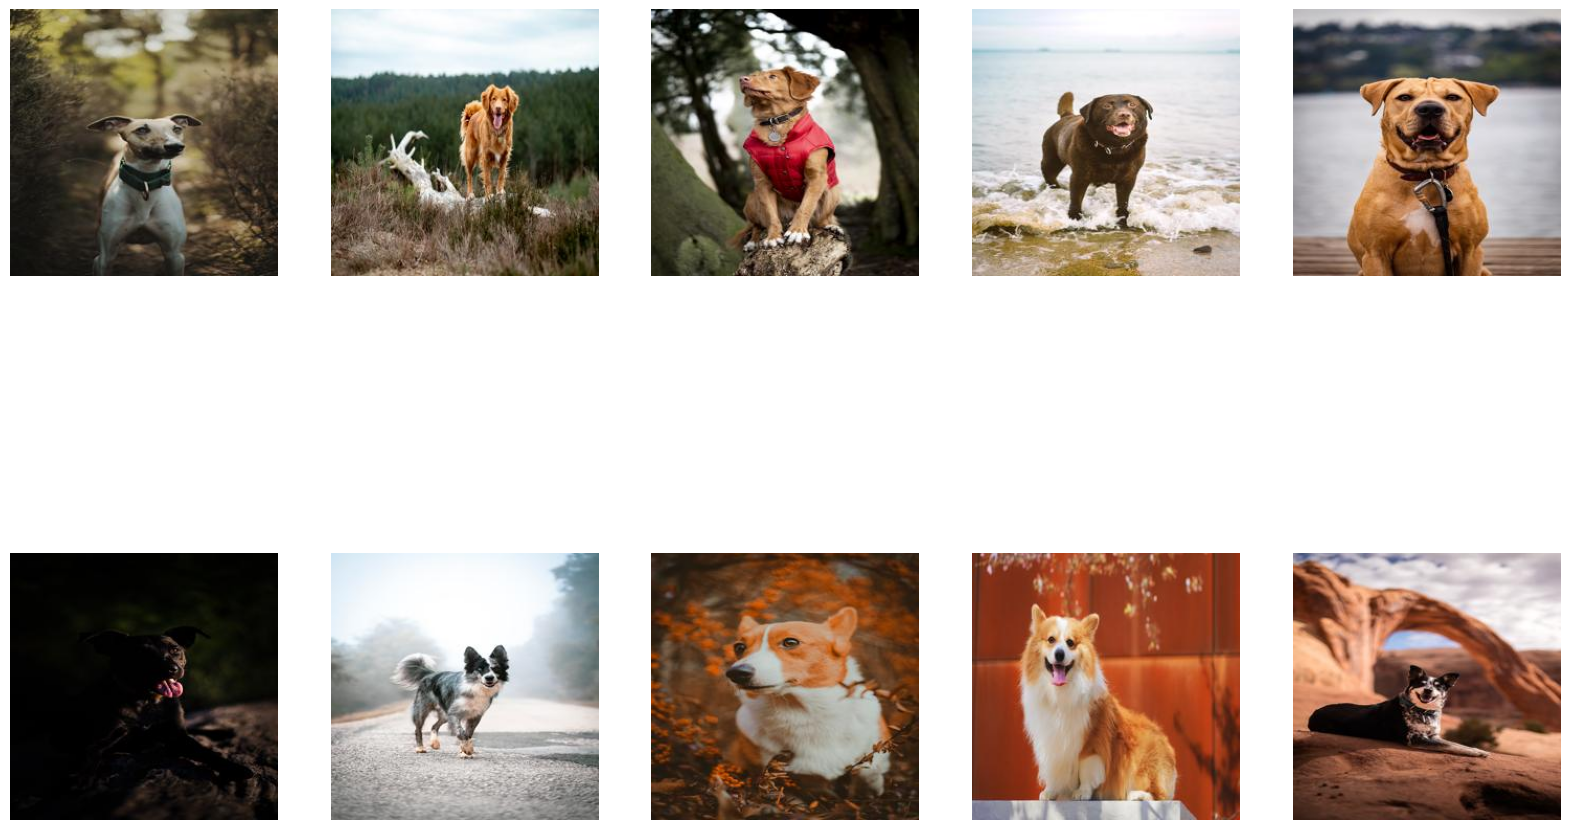

In [15]:
show_images(loaded_images, num_images=NUM_IMAGES)

#### <b>Using sklearn's KNN</b>

[(776, 9.295037814140866), (1081, 9.297276694972087), (671, 9.304404612355897), (498, 9.307170802382782), (1085, 9.308043777028454), (347, 9.313836123475705), (856, 9.31391517075958), (882, 9.31416459535556), (359, 9.315991457616247), (463, 9.316682222065596)]


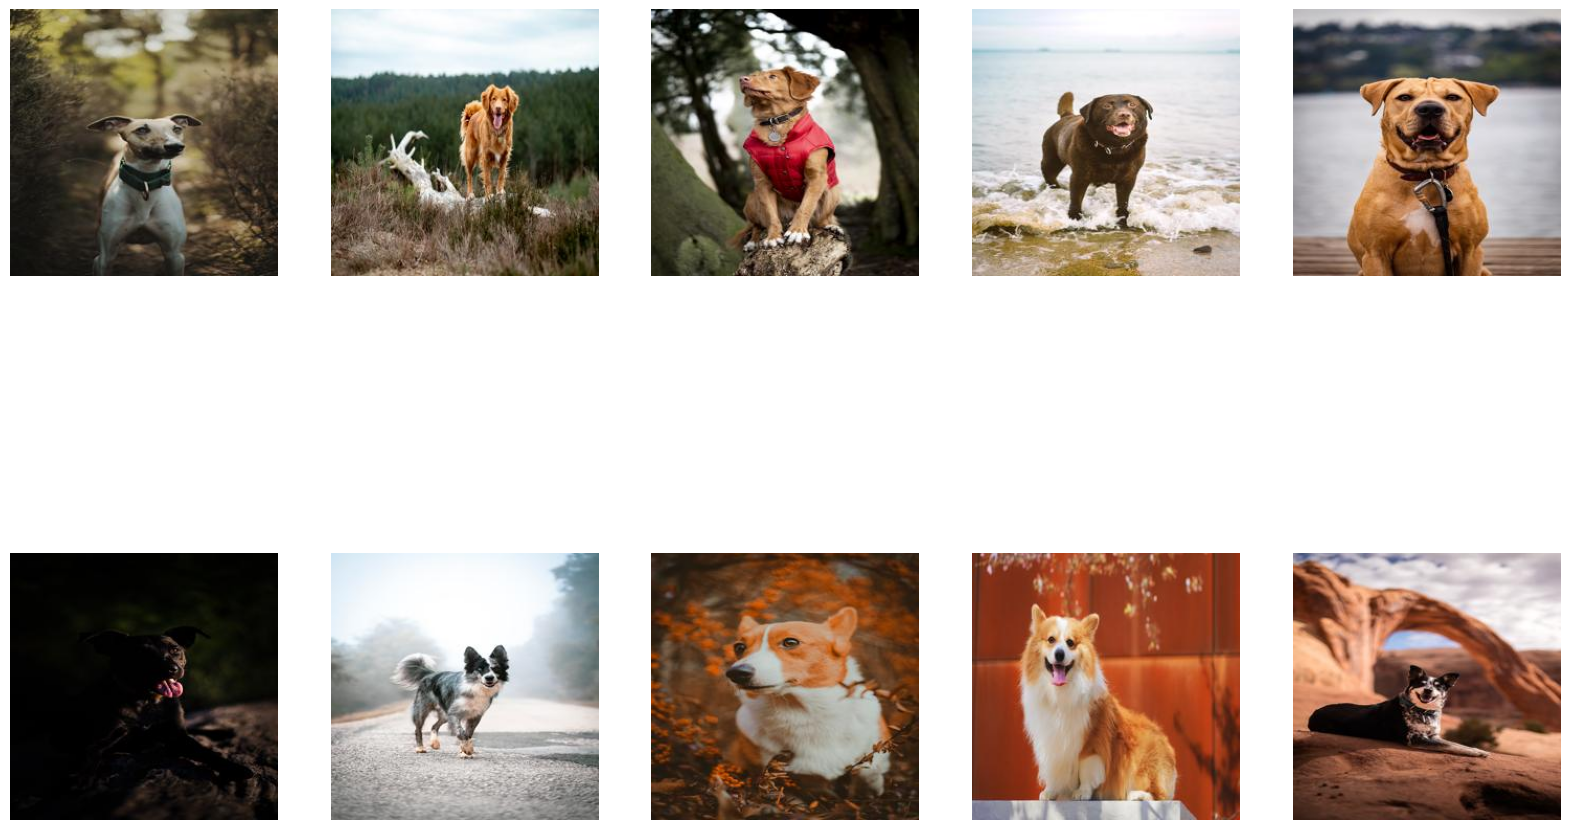

In [38]:
from sklearn.neighbors import KNeighborsClassifier

NEIGHBORS = 10
knn = KNeighborsClassifier(n_neighbors=NEIGHBORS).fit(embeddings, np.zeros(len(embeddings)))

neigh_dist, neigh_ind = knn.kneighbors([text_features], n_neighbors=NEIGHBORS)

print(list(zip(neigh_ind.squeeze(), neigh_dist.squeeze())))

loaded_images = []

for idx in neigh_ind.squeeze():
    path = images_paths[idx]
    image = np.asarray(Image.open(path).resize(RESHAPE))
    loaded_images.append(image)
    del image
    
loaded_images = np.array(loaded_images)
show_images(loaded_images, num_images=NUM_IMAGES)

### <b>FAISS</b>

In [85]:
user_input = input("Search images:").lower()

inputs = tokenizer(user_input, padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs).numpy().squeeze()

Search images: gatos naranjas


In [62]:
import faiss

nlist = 15
d = embeddings.shape[1] # == 512
k = 10

quantizer = faiss.IndexFlatIP(d)  # how the vectors will be stored/compared
index = faiss.IndexIVFFlat(quantizer, d, nlist)
index.train(embeddings)  # we must train the index to cluster into cells
#index.add(embeddings)

In [55]:
index.ntotal

0

In [65]:
index_to_id = {}
id_to_path = {}

image_ids = [os.path.split(path)[-1].split('.')[0] for path in images_paths]
id_to_path = dict(zip(image_ids, images_paths))
for image_id, emb in zip(image_ids, embeddings):
    if image_id not in index_to_id:
        index.add_with_ids(emb.reshape(1, -1), np.array([index.ntotal]))
        index_to_id[index.ntotal - 1] = image_id

In [66]:
print(len(index_to_id), index.ntotal)

1196 1196


In [68]:
index.is_trained

True

IVF index read from file
[(973, 73.702065), (1049, 73.82864), (1050, 73.843185), (891, 73.963646), (1157, 74.00859), (1142, 74.03861), (926, 74.09981), (420, 74.15078), (332, 74.17335), (533, 74.17465)]


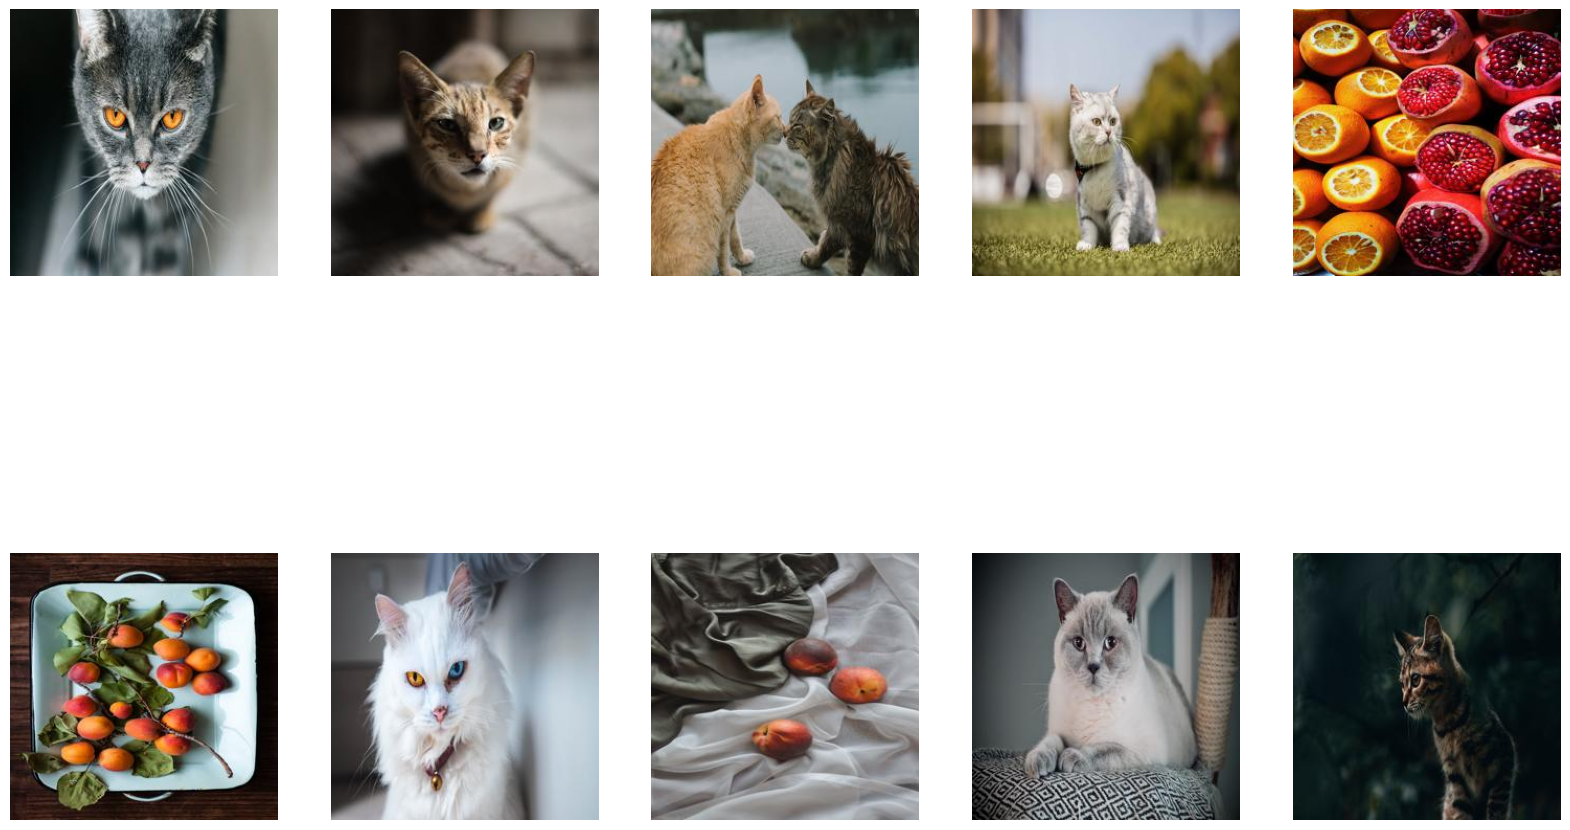

In [86]:
index_path = os.path.join(ASSETS_PATH, 'faiss_ivf.index')

if not os.path.exists(index_path):
    train_embs = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_train_embeddings.npy'))
    
    nlist = 15
    d = train_embs.shape[1] # == 512
    k = 10

    quantizer = faiss.IndexFlatIP(d)  # how the vectors will be stored/compared
    index = faiss.IndexIVFFlat(quantizer, d, nlist)
    index.train(train_embs)  # we must train the index to cluster into cells
    index.add(train_embs)
else:
    index = faiss.read_index(index_path)
    index.nprobe = 3
    print("IVF index read from file")

index.nprobe = 3  # set how many of nearest cells to search
neigh_dist, neigh_ind = index.search(np.array([text_features]), k)
print(list(zip(neigh_ind.squeeze(), neigh_dist.squeeze())))

loaded_images = []

for idx in neigh_ind.squeeze():
    image_id = index_to_id[idx]
    path = id_to_path[image_id]
    image = np.asarray(Image.open(path).resize(RESHAPE))
    loaded_images.append(image)
    del image
    
loaded_images = np.array(loaded_images)
show_images(loaded_images, num_images=NUM_IMAGES)

In [73]:
# write index to file
faiss.write_index(index, os.path.join(ASSETS_PATH, 'faiss_ivf.index'))

In [94]:
# update embeddings
import json

index_path = os.path.join(ASSETS_PATH, 'faiss_ivf.index')
index_map_path = os.path.join(ASSETS_PATH, 'index_to_id.json')
metadata_path = os.path.join(ASSETS_PATH, 'metadata.json')
train_embs = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_train_embeddings.npy')) # required
train_image_ids = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_train_imageids.npy')) # required

if os.path.exists(index_map_path):
    with open(index_map_path, mode='r') as f:
        index_to_id = json.load(f)
else:
    index_to_id = {}

if not os.path.exists(index_path):
    # initialize new index
    nlist = 15
    d = train_embs.shape[1] # == 512

    quantizer = faiss.IndexFlatIP(d)  # how the vectors will be stored/compared
    index = faiss.IndexIVFFlat(quantizer, d, nlist)
    index.train(train_embs)  # we must train the index to cluster into cells
    
    id_to_index = {v:k for k,v in index_to_id.items()}
    
    for image_id, emb in zip(train_image_ids, train_embs):
        if image_id not in id_to_index:
            index.add_with_ids(emb.reshape(1, -1), np.array([index.ntotal]))
            index_to_id[index.ntotal - 1] = image_id
    
    faiss.write_index(index, os.path.join(ASSETS_PATH, 'faiss_ivf.index'))
    
    with open(index_map_path, mode='w+') as f:
        json.dump(index_to_id, f)
        
    print(f"New FAISS index created in '{os.path.join(ASSETS_PATH, 'faiss_ivf.index')}'")
    print(f"New index to ID dictionary created in {index_map_path}")
    print(f"Number of elements in index:", index.ntotal)
    print(f"Index to ID dictionary number of elements:", len(index_to_id))
else:
    index = faiss.read_index(index_path)
    print("IVF index read from file")
    
    id_to_index = {v:k for k,v in index_to_id.items()}
    
    for image_id, emb in zip(train_image_ids, train_embs):
        if image_id not in id_to_index:
            index.add_with_ids(emb.reshape(1, -1), np.array([index.ntotal]))
            index_to_id[index.ntotal - 1] = image_id
        else:
            print(f"Image with ID {image_id} already present in index")
    
    faiss.write_index(index, os.path.join(ASSETS_PATH, 'faiss_ivf.index'))
    
    with open(index_map_path, mode='w+') as f:
        json.dump(index_to_id, f)

IVF index read from file
Image with ID sDJpH62NVnc.jpeg already present in index
Image with ID wamxUVXDLj0.jpeg already present in index
Image with ID _EES7QLyDRs.jpeg already present in index
Image with ID U6QtM1xhT5A.jpeg already present in index
Image with ID YeWfFANhSUo.jpeg already present in index
Image with ID 8pfBVXajR_Y.jpeg already present in index
Image with ID QsEO-fynmos.jpeg already present in index
Image with ID 46qU4oA2Ph8.jpeg already present in index
Image with ID _YTj2yKHyrE.jpeg already present in index
Image with ID m0XjkoEtvG8.jpeg already present in index
Image with ID q_X-lyHxcdk.jpeg already present in index
Image with ID rzOxBlhkziE.jpeg already present in index
Image with ID e5AUV18QJwQ.jpeg already present in index
Image with ID s9rYH_As2Q4.jpeg already present in index
Image with ID 8Yf_m-_HoUk.jpeg already present in index
Image with ID iBh14jRMBI4.jpeg already present in index
Image with ID dYLlEVMfUbc.jpeg already present in index
Image with ID XmqsrSq63

### Lambda function

In [ ]:
import json

def lambda_handler(event, context):
    # TODO implement
    return {
        'statusCode': 200,
        'body': json.dumps('Hello from Lambda!')
    }
